In [1]:
using JLD
using Statistics
using StatsBase 
using LinearAlgebra
using JLD2
using FileIO

In [2]:
using MultivariateStats

In [3]:
include("set.jl")

set_size (generic function with 1 method)

In [4]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
BIGGER_SIZE = 9

# plt.rc("font", family="serif",) #serif="Times"
# plt.rc("font", family= "Times New Roman")
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("text", usetex=true)

In [5]:
size_1_1 = (3.375, 3.375)

(3.375, 3.375)

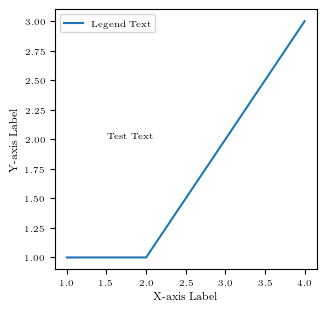

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


In [6]:
fig, ax = plt.subplots(1,1, figsize=size_1_1)

ax.plot([1,2,3,4], [1,1,2,3], label="Legend Text")

ax.text(0.2,0.5,"Test Text", transform=ax.transAxes, color="k",)
ax.set_xlabel("X-axis Label")
ax.set_ylabel("Y-axis Label")

ax.legend()

fig.savefig("Size-Test/prl-1-1.pdf", bbox_inches = "tight")

In [7]:
size_1_2 = (1.5*3.375, 3.375)

(5.0625, 3.375)

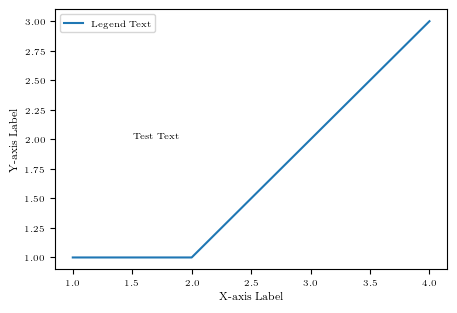

In [8]:
fig, ax = plt.subplots(1,1, figsize=size_1_2)

ax.plot([1,2,3,4], [1,1,2,3], label="Legend Text")

ax.text(0.2,0.5,"Test Text", transform=ax.transAxes, color="k",)
ax.set_xlabel("X-axis Label")
ax.set_ylabel("Y-axis Label")

ax.legend()

fig.savefig("Size-Test/prl-1-2.pdf", bbox_inches = "tight")

In [9]:
size_1_3 = (2*3.375, 3.375)

(6.75, 3.375)

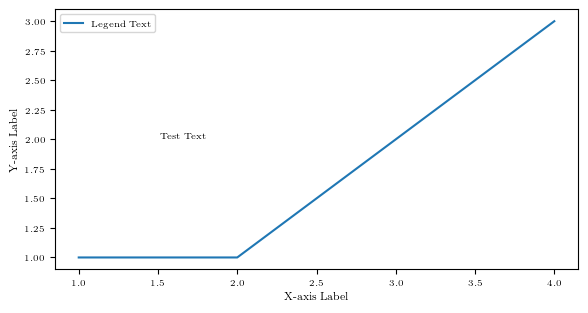

In [10]:
fig, ax = plt.subplots(1,1, figsize=size_1_3)

ax.plot([1,2,3,4], [1,1,2,3], label="Legend Text")

ax.text(0.2,0.5,"Test Text", transform=ax.transAxes, color="k",)
ax.set_xlabel("X-axis Label")
ax.set_ylabel("Y-axis Label")

ax.legend()

fig.savefig("Size-Test/prl-1-3.pdf", bbox_inches = "tight")

In [11]:
golden_ratio = (5^0.5 - 1) / 2

size_1_1 = (3.375, 3.375*golden_ratio)

(3.375, 2.0858647120308955)

In [12]:
xmin, xmax = -1.5, 24.4
x_axis = range(xmin, stop=xmax, length=50)

params = (σ=0.2, σp = 4.0, s=2.775)
cam_pos = [0.0, 1.478, 15.026, 23.164]
σ_x(x) = sqrt.(params.σ^2 + 10^-4*params.σp^2*(params.s - x)^2) 

y_vals = σ_x.(x_axis);

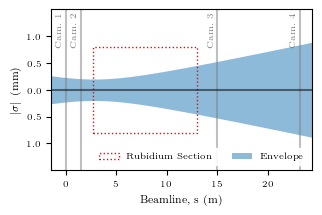

In [13]:
fig, ax = plt.subplots(1,1, figsize=size_1_1)

# ax.plot(x_axis, y_vals, color=:C0, label="Envelope Traj.")
# ax.plot(x_axis, -y_vals, color=:C0)
# proxy = plt.Rectangle((807.3505-804.625, -0.8), 817.6505 - 807.3505, 1.6, fc=plt.cm.bone_r(0.17), label="Rubidium Section")
# ax.add_patch(proxy)

ax.fill_between(x_axis, y_vals, -y_vals, color=:C0, alpha=0.5, lw=0.0, label="Envelope")
# ax.fill_between(x_axis, -y_vals, color=:C0, alpha=0.5, lw=0.0,)

proxy = plt.Rectangle((807.3505-804.625, -0.8), 817.6505 - 807.3505, 1.6, fc = "None", ec=:red, ls=:dotted, label="Rubidium Section")
ax.add_patch(proxy)


[ax.axvline(i, linestyle="-", color="gray", alpha=0.5) for i in cam_pos]
ax.axvline(-10, linestyle="-", color="gray", alpha=0.5,)
ax.axhline(0, linestyle="-", color="black", alpha=0.5) 

# ax.vlines(params.s, -0.5, 0.5, ls="dashed", color=:C0, label="Waist")

ax.text(cam_pos[1]-1,0.80, "Cam. 1", color="gray", rotation="vertical")
ax.text(cam_pos[2]-1,0.80, "Cam. 2", color="gray", rotation="vertical")
ax.text(cam_pos[3]-1,0.80, "Cam. 3", color="gray", rotation="vertical")
ax.text(cam_pos[4]-1,0.80, "Cam. 4", color="gray", rotation="vertical")

ylabels = [-1.0, -0.5, 0.0, 0.5, 1.0]
ymodlabels = abs.(ylabels)

ax.set_yticks(ylabels)
ax.set_yticklabels(ymodlabels, minor=false)

ax.legend(loc="lower right", ncol=2, framealpha=0.9, edgecolor=:white)

ax.set_xlim(xmin, xmax)
ax.set_ylim(-1.5, 1.5)

ax.set_ylabel(L"\left | \sigma \right |  \; (\mathrm{mm})")
ax.set_xlabel("Beamline, s (m)")

fig.savefig("../plots-prl/setup-example.pdf", bbox_inches = "tight")

In [14]:
data = load("../data/experiment/images.jld")

Dict{String, Any} with 5 entries:
  "ImagesIS2"   => [0 0 … 0 0; 0 0 … 0 0; … ; 43 33 … 35 15; 23 140 … 44 28]…
  "ImagesBTV50" => [10 3 … 0 0; 3 0 … 0 0; … ; 6 0 … 0 0; 4 0 … 0 0]…
  "charge"      => [0.1298, 0.1712, 0.095, 0.0433, 0.097, 0.136, 0.1404, 0.1837…
  "ImagesBTV26" => [81 24 … 14 0; 70 49 … 37 0; … ; 38 54 … 23 3; 69 22 … 23 4]…
  "ImagesBTV53" => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 21 0; 0 0 … 0 0]…

In [15]:
cam_1 = Float64.(data["ImagesBTV50"])
cam_2 = Float64.(data["ImagesBTV53"])
cam_3  = Float64.(data["ImagesBTV26"])
cam_4 = Float64.(data["ImagesIS2"])
charge  = Float64.(data["charge"])

enumerate_events = collect(1:length(charge));

In [16]:
intensity(x) = [sum(x, dims=(2, 3))...]

intensity (generic function with 1 method)

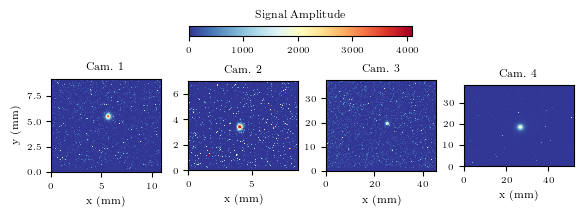

In [17]:
fig, ax = plt.subplots(1,4, figsize=size_1_3)

fig.subplots_adjust(hspace=0.0, wspace=0.25)

ev_number = 200

im = ax[1].pcolormesh(collect(0:400) .* 0.0271, collect(0:300) .* 0.0305,  cam_1[ev_number,:,:], vmin=0.0, vmax=2^12, cmap="RdYlBu_r")
ax[2].pcolormesh(collect(0:400) .* 0.0216, collect(0:300) .* 0.0234, cam_2[ev_number,:,:], vmin=0.0, vmax=2^12, cmap="RdYlBu_r")
ax[3].pcolormesh(collect(0:400) .* 0.114, collect(0:300) .* 0.125, cam_3[ev_number,:,:], vmin=0.0, vmax=2^12, cmap="RdYlBu_r")
ax[4].pcolormesh(collect(0:1280) .* 0.0406, collect(0:960) .* 0.0400, cam_4[ev_number,:,:], vmin=0.0, vmax=2^12, cmap="RdYlBu_r")

ax[1].set_aspect("equal")
ax[2].set_aspect("equal")
ax[3].set_aspect("equal")
ax[4].set_aspect("equal")

cb_ax = fig.add_axes([0.33, 0.76, 0.33, 0.03])
cbar = fig.colorbar(im, cax=cb_ax, orientation="horizontal")
cbar.ax.set_title("Signal Amplitude")
ax[1].set_ylabel("y (mm)")

ax[1].set_xlabel("x (mm)")
ax[2].set_xlabel("x (mm)")
ax[3].set_xlabel("x (mm)")
ax[4].set_xlabel("x (mm)")
# ax[2,2].set_xlabel("x (mm)")

ax[1].set_title("Cam. 1")
ax[2].set_title("Cam. 2")
ax[3].set_title("Cam. 3")
ax[4].set_title("Cam. 4")


fig.savefig("../plots-prl/event-example.png", bbox_inches = "tight", dpi=350)

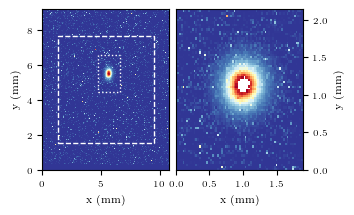

In [18]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=size_1_1)

fig.subplots_adjust(hspace=0.1, wspace=0.05)

ev_number = 200

ax.pcolormesh(collect(0:400) .* 0.0271, collect(0:300) .* 0.0305,  cam_1[ev_number,:,:], cmap="RdYlBu_r")

img_tmpp = cam_1[ev_number,145:145+70, 175:175+70]

img_tmpp = replace(x-> x > 3000 ? NaN : x, img_tmpp )
ax2.pcolormesh(collect(0:70) .* 0.0271, collect(0:70) .* 0.0305, img_tmpp, cmap="RdYlBu_r")

proxy = plt.Rectangle((50*0.0271, 50*0.0305), 300*0.0271, 200*0.0305, fc = "None", ec=:white, ls=:dashed, lw=1, label="Rubidium Section")
ax.add_patch(proxy)

proxy = plt.Rectangle((175*0.0271, 145*0.0305), 70*0.0271, 70*0.0305, fc = "None", ec=:white, ls=:dotted, lw=1, label="Rubidium Section")
ax.add_patch(proxy)


ax.set_ylabel("y (mm)")
ax.set_xlabel("x (mm)")

ax2.set_ylabel("y (mm)")
ax2.set_xlabel("x (mm)")

ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()


# fig.savefig("../plots-prl/noise-example.png", bbox_inches = "tight", dpi=350)